# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Septina Rahma Devi Putri Purbowati]
- **Email:** [septinarahmadevi@gmail.com]
- **ID Dicoding:** [seradevi]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda oleh pengguna kasual dan terdaftar berubah selama setiap musim dalam dua tahun terakhir?
- Seberapa signifikan pengaruh kondisi cuaca (misalnya suhu dan kelembapan) terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan akhir pekan selama satu tahun terakhir?
- Apakah ada tren penggunaan sepeda berdasarkan waktu (jam) pada hari kerja dibandingkan dengan akhir pekan selama bulan tertentu?
- Bagaimana perubahan penggunaan sepeda pada hari libur nasional mempengaruhi jumlah pengguna terdaftar dibandingkan pengguna kasual selama dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
hours_df = pd.read_csv("hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
days_df = pd.read_csv("day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel hours_df

In [42]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [43]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [44]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:
- Ada tipe data yang tidak sesuai pada kolom 'dteday' data hour.csv. Seharusnya data yang berisi tanggal memiliki tipe data 'datetime', sedangkan kolom 'dteday' yang berisi tanggal memiliki tipe data 'object'.
- Sehingga perlu cleaning data untuk mengganti tipe data kolom 'dteday'.

#### Menilai tabel days_df

In [45]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [47]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:
- Ada tipe data yang tidak sesuai pada kolom 'dteday' pada data day.csv. Seharusnya data yang berisi tanggal memiliki tipe data 'datetime', sedangkan kolom 'dteday' yang berisi tanggal memiliki tipe data 'object'.
- Sehingga perlu cleaning data untuk mengganti tipe data kolom 'dteday'.

### Cleaning Data

In [48]:
hours_df['dteday'] = pd.to_datetime (hours_df['dteday'])

In [49]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [50]:
days_df['dteday'] = pd.to_datetime (days_df['dteday'])

In [51]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Cleaning dilakukan pada kolom "dteday" yang memiliki tipe data object, sehingga tipe data kolom "dteday" telah sesuai tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore tabel hours_df

In [52]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5544,5545,2011-08-23,3,0,8,22,0,2,1,1,0.62,0.6212,0.57,0.1343,46,145,191
4183,4184,2011-06-28,3,0,6,5,0,2,1,1,0.66,0.6061,0.78,0.0000,1,20,21
11515,11516,2012-04-30,2,1,4,0,0,1,1,1,0.44,0.4394,0.72,0.1045,12,36,48
7995,7996,2011-12-04,4,0,12,19,0,0,0,1,0.38,0.3939,0.76,0.0000,15,158,173
1298,1299,2011-02-27,1,0,2,7,0,0,0,1,0.24,0.2424,0.87,0.1343,6,8,14


In [53]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


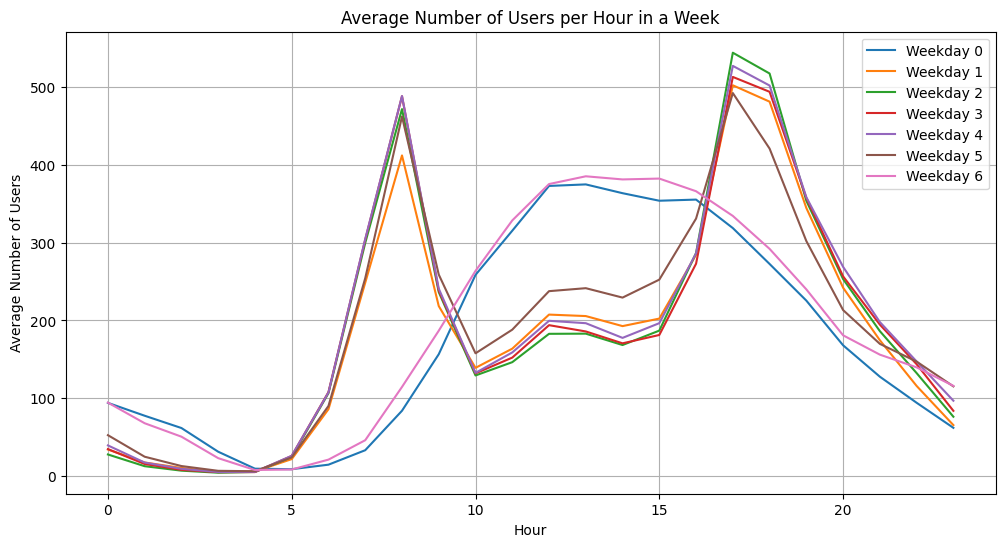

In [54]:
import matplotlib.pyplot as plt

hourly_avg_users = hours_df.groupby(['hr', 'weekday'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 6))
for weekday in range(7):
  plt.plot(hourly_avg_users.index, hourly_avg_users[weekday], label=f'Weekday {weekday}')

plt.xlabel('Hour')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users per Hour in a Week')
plt.legend()
plt.grid(True)
plt.show()


**Insight:**
- Rata-rata tertinggi pengguna ketika weekday 1-5 (senin-jumat) ada di antara jam 05.00-10.00 dan di antara jam 15.00-20.00

### Explore tabel days_df

In [55]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
211,212,2011-07-31,3,0,7,0,0,0,1,0.805833,0.729796,0.480833,0.164813,1524,2778,4302
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
459,460,2012-04-04,2,1,4,0,3,1,1,0.541667,0.533450,0.469583,0.180975,1058,5378,6436
59,60,2011-03-01,1,0,3,0,2,1,1,0.266667,0.263879,0.535000,0.216425,137,1714,1851
232,233,2011-08-21,3,0,8,0,0,0,1,0.710833,0.675525,0.770000,0.248754,1249,2624,3873


In [56]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


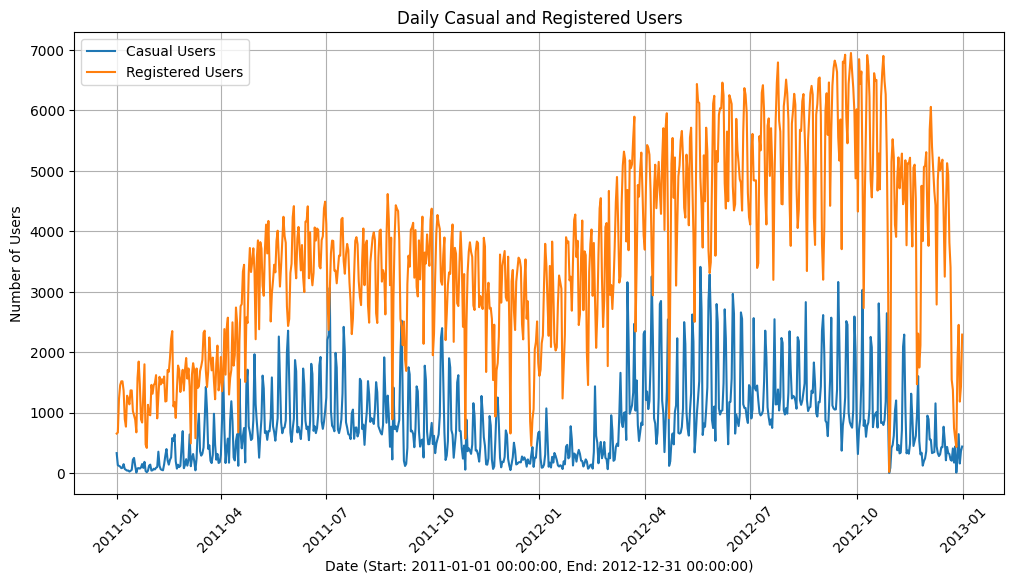

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(days_df['dteday'], days_df['casual'], label='Casual Users')
plt.plot(days_df['dteday'], days_df['registered'], label='Registered Users')
plt.xlabel('Date (Start: ' + str(days_df['dteday'].iloc[0]) + ', End: ' + str(days_df['dteday'].iloc[-1]) + ')')
plt.ylabel('Number of Users')
plt.title('Daily Casual and Registered Users')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Visualization & Explanatory Analysis

### Bagaimana pola penggunaan sepeda oleh pengguna casual dan registered berubah selama setiap musim dalam dua tahun terakhir?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


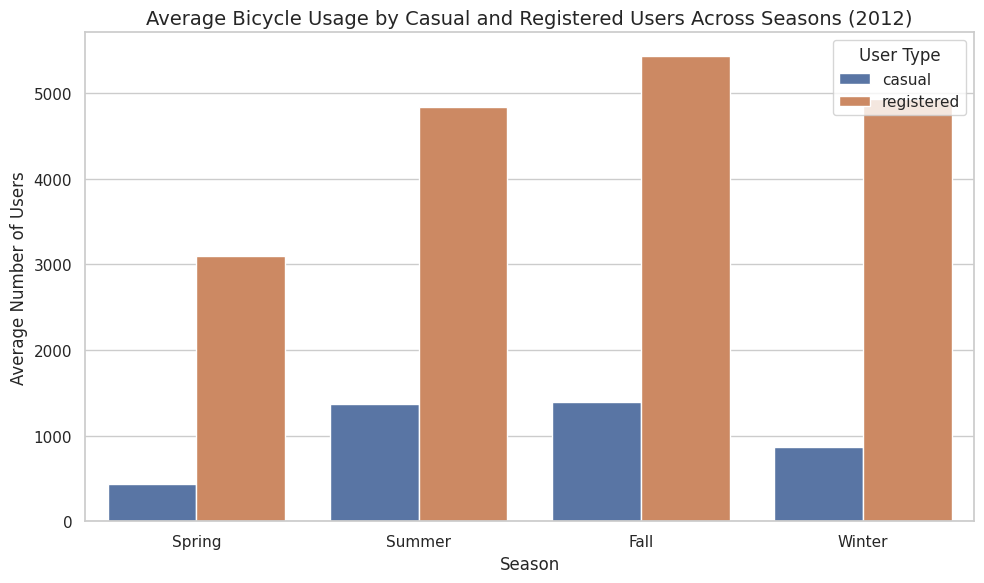

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

days_df_filtered = days_df[days_df['yr'] == 1]
seasonal_usage = days_df_filtered.groupby('season')[['casual', 'registered']].mean().reset_index()

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
seasonal_usage['season'] = seasonal_usage['season'].map(season_labels)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='value', hue='variable', data=pd.melt(seasonal_usage, ['season']))

plt.title('Average Bicycle Usage by Casual and Registered Users Across Seasons (2012)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Number of Users', fontsize=12)
plt.legend(title='User Type', loc='upper right')
plt.tight_layout()
plt.show()


**Insight:**
- Pengguna casual dan registered memiliki perilaku yang sama selama tahun 2012, yaitu:
1. rata-rata pengguna casual dan registered terendah ada di musim semi
2. rata-rata pengguna casual dan registered mulai naik di musim panas
3. rata-rata pengguna casual dan registered tertinggi ada di musim gugur
4. rata-rata pengguna casual dan registered menurun di musim dingin

- Tetapi, perilaku pengguna casual dan registered berbanding terbalik pada musim panas dan dingin. Dimana rata-rata pengguna casual lebih banyak di musim panas daripada musim dingin, sedangkan rata-rata pengguna registered lebih banyak di musim dingin daripada di musim panas.

### Seberapa signifikan pengaruh kondisi cuaca (misalnya suhu dan kelembapan) terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan akhir pekan selama satu tahun terakhir?

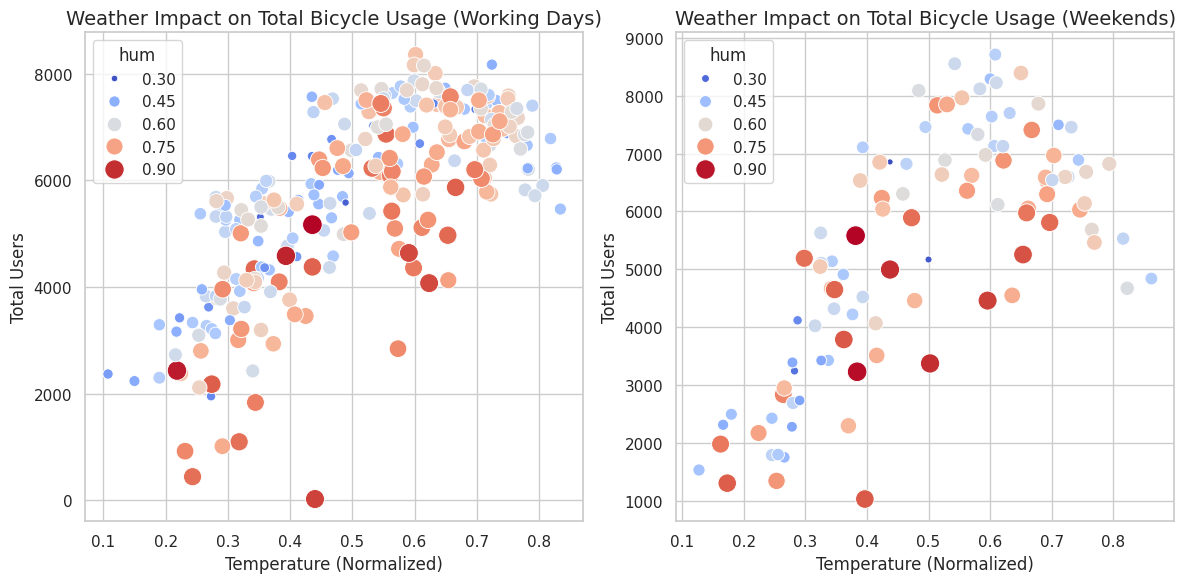

Correlation for Working Days:
cnt     1.000000
temp    0.723440
hum    -0.112806
Name: cnt, dtype: float64

Correlation for Weekends:
cnt     1.000000
temp    0.696863
hum    -0.048692
Name: cnt, dtype: float64


In [62]:
last_year_data = days_df[days_df['yr'] == 1].copy()
last_year_data.loc[:, 'day_type'] = last_year_data['weekday'].apply(lambda x: 'Weekend' if x == 0 or x == 6 else 'Working Day')

working_day_data = last_year_data[last_year_data['day_type'] == 'Working Day']
weekend_data = last_year_data[last_year_data['day_type'] == 'Weekend']

working_corr_temp = working_day_data[['cnt', 'temp', 'hum']].corr().loc['cnt']
weekend_corr_temp = weekend_data[['cnt', 'temp', 'hum']].corr().loc['cnt']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='temp', y='cnt', hue='hum', size='hum', sizes=(20, 200), data=working_day_data, palette="coolwarm")
plt.title('Weather Impact on Total Bicycle Usage (Working Days)', fontsize=14)
plt.xlabel('Temperature (Normalized)', fontsize=12)
plt.ylabel('Total Users', fontsize=12)

plt.subplot(1, 2, 2)
sns.scatterplot(x='temp', y='cnt', hue='hum', size='hum', sizes=(20, 200), data=weekend_data, palette="coolwarm")
plt.title('Weather Impact on Total Bicycle Usage (Weekends)', fontsize=14)
plt.xlabel('Temperature (Normalized)', fontsize=12)
plt.ylabel('Total Users', fontsize=12)

plt.tight_layout()
plt.show()

# Display correlation results
print("Correlation for Working Days:")
print(working_corr_temp)
print("\nCorrelation for Weekends:")
print(weekend_corr_temp)

**Insight:**
- Weekdays:
1. Pengaruh suhu terhadap total pengguna signifikan, dilihat dari saat suhu meningkat, jumlah pengguna sepeda juga meningkat.
2. Hubungan antara suhu dan jumlah pengguna terlihat lebih jelas pada hari kerja, di mana semakin tinggi suhu, semakin banyak pengguna sepeda.
3. Kelembapan memiliki pengaruh, tetapi tidak sebesar suhu.

- Weekend:
1. Pengaruh suhu terhadap total pengguna sepeda cukup signifikan, walaupun persebaran data ini lebih luas.
2. Pada suhu yang lebih rendah (sekitar 0.3–0.4), masih ada jumlah pengguna yang cukup tinggi, dibandingkan dengan hari kerja.
3. Kelembapan juga menunjukkan tren serupa, tetapi pengguna sepeda tidak terlalu terpengaruh oleh kelembapan tinggi

Suhu adalah faktor yang lebih signifikan dibandingkan kelembapan dalam mempengaruhi penggunaan sepeda, baik pada hari kerja maupun akhir pekan.
Pada hari kerja, ada hubungan yang lebih kuat antara suhu dan jumlah pengguna sepeda, sementara peningkatan pengguna lebih bervariasi bahkan pada suhu yang lebih rendah di akhir pekan .

### Apakah ada tren penggunaan sepeda berdasarkan waktu (jam) pada hari kerja dibandingkan dengan akhir pekan selama bulan tertentu?

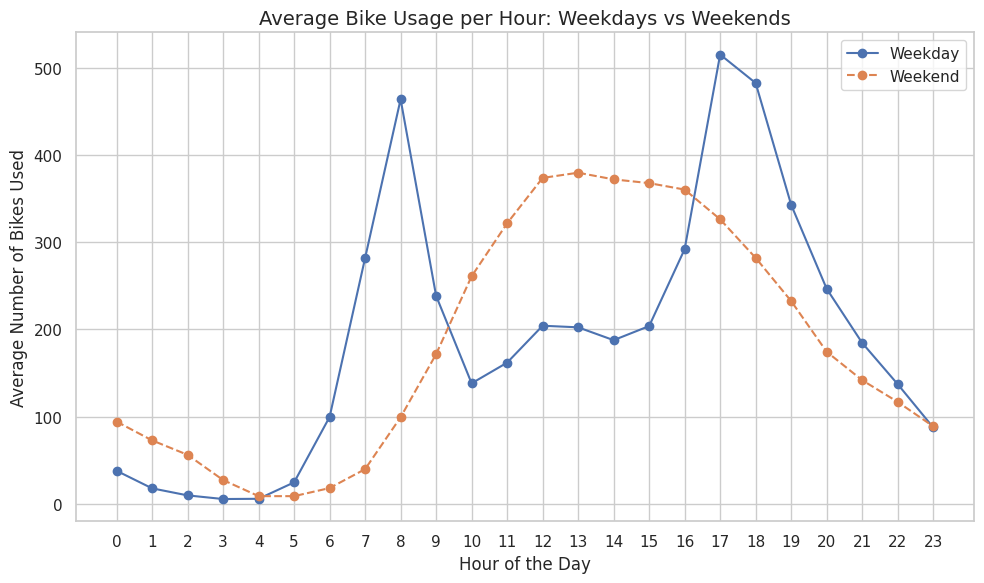

In [63]:
hours_df['is_weekend'] = hours_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

avg_bike_usage_by_hour = hours_df.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()

avg_bike_usage_by_hour_pivot = avg_bike_usage_by_hour.pivot(index='hr', columns='is_weekend', values='cnt')
avg_bike_usage_by_hour_pivot.columns = ['Weekday', 'Weekend']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(avg_bike_usage_by_hour_pivot.index, avg_bike_usage_by_hour_pivot['Weekday'], label='Weekday', marker='o')
plt.plot(avg_bike_usage_by_hour_pivot.index, avg_bike_usage_by_hour_pivot['Weekend'], label='Weekend', marker='o', linestyle='--')

plt.title('Average Bike Usage per Hour: Weekdays vs Weekends', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Number of Bikes Used', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()

plt.grid(True)

plt.tight_layout()
plt.show()

**Insight:**  
1. Terdapat dua puncak penggunaan sepeda yang jelas pada Weekday:
- Pagi sekitar pukul 8:00 dengan penggunaan yang sangat tinggi, sekitar 500 sepeda.
- Sore sekitar pukul 17:00 dengan puncak penggunaan lebih dari 400 sepeda.

Ini menunjukkan bahwa banyak pengguna memanfaatkan sepeda untuk perjalanan harian seperti berangkat dan pulang kerja atau sekolah.
Penggunaan sepeda menurun secara signifikan pada malam hari (setelah pukul 18:00) dan pagi dini hari (sebelum pukul 6:00).

2. Pola penggunaan lebih stabil pada Weekend:
- Penggunaan sepeda mulai meningkat dari pukul 10:00 dan mencapai puncak antara pukul 12:00 hingga 15:00, sekitar 300 sepeda.
- Setelah itu, penggunaan mulai menurun secara bertahap menjelang malam hari.

Tren ini menunjukkan bahwa sepeda lebih banyak digunakan untuk rekreasi atau aktivitas santai selama akhir pekan, bukan untuk tujuan perjalanan rutin.

### Bagaimana perubahan penggunaan sepeda pada hari libur nasional mempengaruhi jumlah pengguna terdaftar dibandingkan pengguna kasual selama dua tahun terakhir?

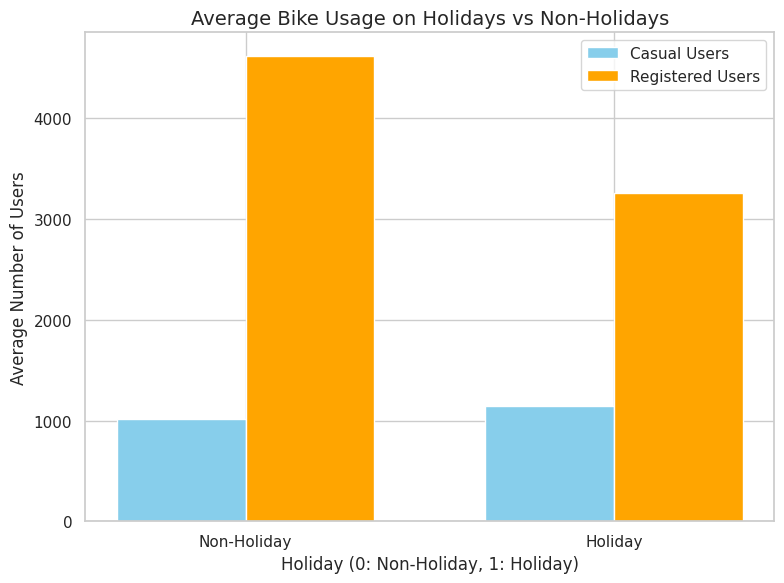

In [49]:
recent_data = days_df[days_df['yr'] == 1]

holiday_vs_non_holiday = recent_data.groupby('holiday')[['casual', 'registered']].mean().reset_index()
holiday_vs_non_holiday.columns = ['Holiday', 'Avg Casual Users', 'Avg Registered Users']

# Plotting
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = [0, 1]  # 0 for non-holiday, 1 for holiday

plt.bar(index, holiday_vs_non_holiday['Avg Casual Users'], bar_width, label='Casual Users', color='skyblue')
plt.bar([i + bar_width for i in index], holiday_vs_non_holiday['Avg Registered Users'], bar_width, label='Registered Users', color='orange')

plt.title('Average Bike Usage on Holidays vs Non-Holidays', fontsize=14)
plt.xlabel('Holiday (0: Non-Holiday, 1: Holiday)', fontsize=12)
plt.ylabel('Average Number of Users', fontsize=12)
plt.xticks([i + bar_width / 2 for i in index], ['Non-Holiday', 'Holiday'])
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**
- Registered Users:
1. Pada hari biasa, jumlah pengguna terdaftar mencapai puncaknya, lebih dari 4000 pengguna rata-rata. Ini menunjukkan bahwa pengguna terdaftar cenderung memanfaatkan sepeda untuk kegiatan rutin seperti perjalanan harian.
2. Pada hari libur, jumlah pengguna terdaftar menurun menjadi sekitar 3000 pengguna. Ini mungkin karena pada hari libur, kebutuhan perjalanan rutin (seperti pergi bekerja atau sekolah) berkurang.

- Casual Users:

1. Pada hari biasa, jumlah pengguna kasual lebih sedikit sekitar 1000 pengguna. Ini menunjukkan bahwa orang yang tidak terdaftar cenderung menggunakan sepeda lebih sedikit saat hari-hari kerja biasa.
2. Pada hari libur, jumlah pengguna kasual sedikit meningkat mendekati 1500 pengguna. Ini menunjukkan bahwa lebih banyak orang yang tidak terdaftar memanfaatkan sepeda untuk rekreasi atau aktivitas santai pada hari libur.

## Conclusion

1. **Tren Pengguna Seasonal:** Pengguna registered lebih konsisten sepanjang tahun, dengan penggunaan tertinggi di musim gugur dan terendah di musim dingin. Mereka tetap menggunakan sepeda meskipun kondisi cuaca berubah.Pengguna casual cenderung memanfaatkan sepeda lebih banyak selama musim panas dan gugur, kemungkinan untuk rekreasi atau aktivitas di luar ruangan. Secara keseluruhan, musim panas dan gugur adalah periode dengan penggunaan sepeda tertinggi untuk kedua kelompok, sementara musim dingin dan musim semi adalah periode dengan penggunaan terendah.
2. **Tren Pengguna berdasarkan Suhu:** Pada hari kerja, ada hubungan yang lebih kuat antara suhu dan jumlah pengguna sepeda. Sementara di akhir pekan, pengguna lebih bervariasi dengan peningkatan pengguna bahkan pada suhu yang lebih rendah. Kelembapan tampaknya mempengaruhi penggunaan sepeda, tetapi tidak sekuat suhu. Pengguna cenderung masih menggunakan sepeda pada kelembapan tinggi, terutama pada akhir pekan. Sehingga suhu adalah faktor yang lebih signifikan dibandingkan kelembapan dalam mempengaruhi penggunaan sepeda, baik pada hari kerja maupun akhir pekan.
3. **Tren Pengguna per Jam:** Pada hari kerja sepeda digunakan lebih banyak selama jam-jam sibuk pagi dan sore, sedangkan pada akhir pekan penggunaan sepeda lebih merata sepanjang hari, terutama di siang hari.
4. **Tren Pengguna pada holidays dan workingday:** Pengguna terdaftar jauh lebih dominan pada hari biasa dibandingkan dengan pengguna kasual, menunjukkan bahwa sebagian besar perjalanan sepeda pada hari kerja dilakukan oleh mereka yang menggunakan layanan secara rutin. Pada hari libur, ada sedikit peningkatan dalam penggunaan sepeda oleh pengguna kasual, menunjukkan bahwa hari libur menarik lebih banyak orang yang sesekali menggunakan sepeda untuk keperluan rekreasi. Secara keseluruhan, hari libur tampaknya lebih menarik bagi pengguna kasual, sementara pengguna terdaftar menggunakan sepeda lebih banyak pada hari kerja reguler.